In [2]:
import pandas as pd

## **Introduction** ##


The study takes place in the context of breast cancer and RUNX1, a transcription factor that functions both as a oncogene and a tumor supressor in breast cancer. Specifically, the study focuses on RUNX1's contribution to higher-order chromatin organization and gene regulation. The researchers aim to understand how RUNX1-mediated transcriptional activity is linked to genome organization and how its dysfunction may contribute to breast cancer progression, given that alterations in nuclear architecture and chromatin structure are hallmarks of the disease. To address these questions the authors used MCF-7 breast cancer cell lines with RUNX1 knocked down and applied a combination of bioinformatic techniques, including RNA-seq for gene expression profiling, ChIP-seq for mapping RUNX1 binding sites, and Hi-C for analyzing three-dimensional chromatin interactions.  Employing these techniques allowed the authors to dissect the complex relationship between genome architecture, transcription factor binding, and gene expression at a genome-wide scale. RNA-seq quantified the changes in gene expression resulting from RUNX1 knockdown, ChIP-seq established direct RUNX1 target loci, and Hi-C maps provided insight into RUNX1’s role in fine-tuning chromatin interactions and topologically associating domain (TAD) organization, highlighting its architectural function in breast cancer cells. This enabled a comprehensive investigation of the molecular consequences of RUNX1 loss, revealing its regulatory impact on extracellular matrix genes, long noncoding RNAs such as NEAT1 and MALAT1, and chromatin assembly processes.

## **Methods** ##


ChIP-seq datasets were obtained from the NCBI Gene Expression Omnibus (GEO) under accession number GSE75070. All analyses were performed using a Nextflow pipeline with containerized tools (ghcr.io/bf528) executed through Singularity to ensure reproducibility.

**Read Processing and Quality Control**

Raw FASTQ files were first assessed using FastQC v0.12.1 with default parameters to evaluate sequencing quality. Adapter sequences and low-quality bases were removed using Trimmomatic v0.39 with default parameters. 

**Alignment and Post-alignment Processing**

Filtered and trimmed reads were aligned to the GRCh38 (gencode v47) human reference genome using Bowtie2 v2.5.4 with default parameters. Resulting alignments were processed using SAMtools v1.21 for sorting, indexing, and filtering, and alignment statistics were obtained using the flagstat utility, all with default parameters. All alignment and QC metrics were summarized and aggregated using MultiQC v1.25.

**Peak Calling and Reproducible Peak Identification**

Peak calling was performed with HOMER v5.1 using default parameters. Reproducible peaks were defined by intersecting peaks from both biological replicates with a ≥50% reciprocal overlap using BEDtools v2.31.1 (threshold chosen as it is stringent enough to avoid false positives while being permissive to caputre true biological reproducibility). Peaks overlapping the hg38 blacklist v2 curated by the Boyle Lab were removed from the final peak set. Peak annotation and motif discovery were conducted using HOMER (v5.1).

**Data Visualization and Signal Quantification**

Coverage tracks (BigWig files) were generated from sorted and indexed BAM files using the bamCoverage utility in deepTools v3.5.5 with default parameters. Signal coverage plots were generated with deepTools computeMatrix (scale-regions mode) using ±2000 bp flanking regions around transcription start and termination sites (TSS/TTS). Gene coordinates for hg38 were obtained from the UCSC Genome Browser RefSeq (reGene) annotation set. Pearson sample correlation analyses were performed using multiBigWigSummary and plotCorrelation in deepTools with default parameters.

## **Quality Control Evaluation** ##

The MultiQC report indicates that the overall quality of the ChIP-seq experiment is high. The sequencing depth ranged from high coverage in most samples (28.6M reads for INPUTrep1, 27.8M reads for IPrep1 and 28.2M reads for IPrep2) to substantially lower depth in Input Rep2 (10.1M reads mapped), which may suggest reduced complexity or suboptimal library preparation for that sample. Although this could potentially affect normalization, the authors proceeded with the experiment, likely because input samples primarily serve as background controls and the remaining metrics indicated sufficient quality.

FastQC did not flag major read-quality issues, all samples showed Phred scores above 30 across nearly all base positions, indicating excellent base-calling accuracy. Per-base sequence content was flagged, but this is common in early cycles of Illumina sequencing and is not concerning for ChIP-seq, where fragment composition is inherently biased by protein–DNA binding. Alignment rates were consistently strong (over 93% of reads mapped for all samples as shown by Samtools flagstat), which is expected for high-quality ChIP-seq datasets aligned to hg38. FastQC did detect GC-content deviations in the two IP samples, which “failed” the GC-content module, while the two input samples passed. However, this pattern is biologically plausible since ROX1 binding is sequence-specific, and enrichment of certain GC-rich motifs can lead to non-uniform GC distributions. Similarly, duplication levels were elevated in the IP samples compared to the inputs. This is also expected, as immunoprecipitation enriches for a limited subset of genomic fragments, producing higher duplication rates relative to the broader, more diverse input libraries. 

Overrepresented sequences were not detected at levels high enough to warrant attention. Some adapter contamination was present across the reads, but this issue was resolved through trimming with Trimmomatic. Based on all metrics, including read depth, alignment rates, base quality, GC content, duplication levels, adapter removal, and taking into account the biology of the experiment, the experiment appears to be of sufficiently high quality to proceed with downstream analysis.


## **Signal Coverage Plot** ##

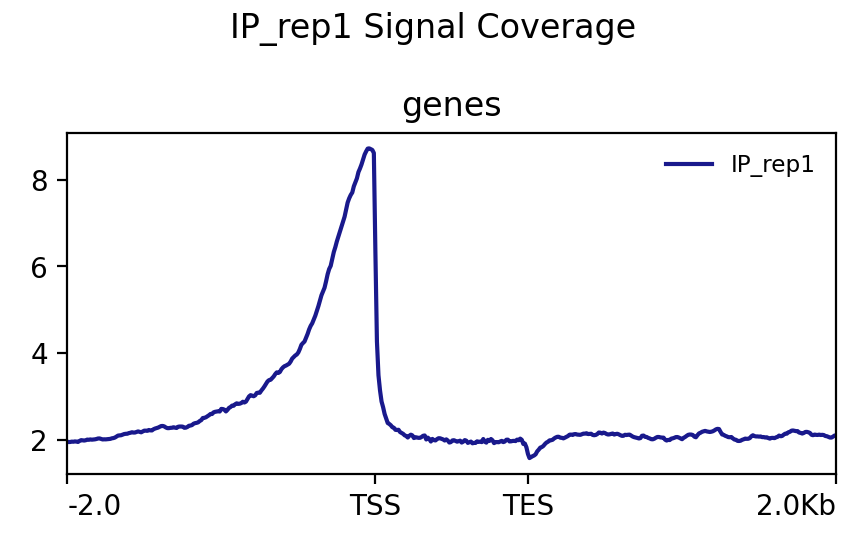

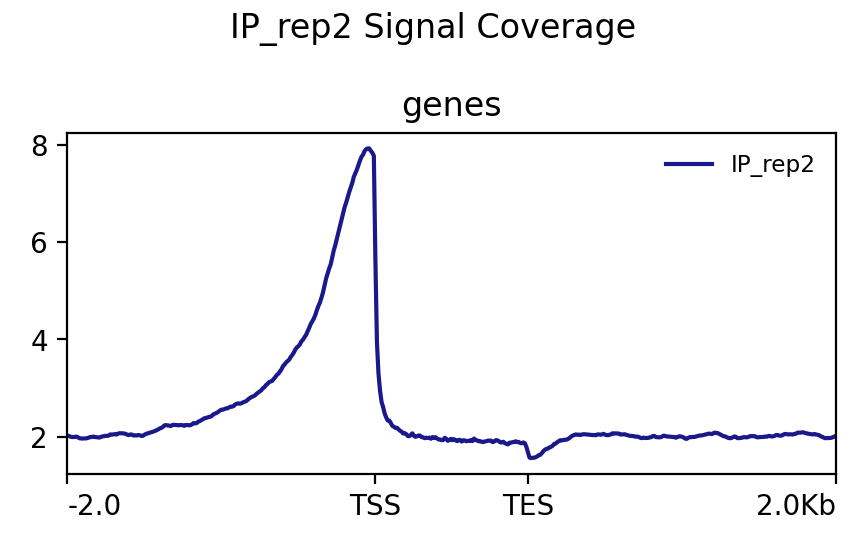

The signal coverage plots show the average IP signal intensity aligned to annotated genes in hg38. In both replicates, the coverage reveals a strong enrichment at transcription start sites (TSS), indicating that ROX1 binds preferentially near promoters. This pattern is consistent with ROX1 functioning as a transcription factor, as promoter-proximal binding is typically associated with gene regulation. Background signal across the rest of the genome remains low, and the high similarity between replicates supports the overall quality and reproducibility of the experiment.


## **Motif Finding** ##

In [8]:
import pandas as pd
motif = pd.read_csv("results/motifs/knownResults.txt" ,sep="\t", dtype=str)
motif.head(10)

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 5027),% of Target Sequences with Motif,# of Background Sequences with Motif(of 41209),% of Background Sequences with Motif
0,RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer,SAAACCACAG,1e-616,-1.420e+03,0.0000,1464.0,29.12%,2266.5,5.50%
1,RUNX1(Runt)/Jurkat-RUNX1-ChIP-Seq(GSE29180)/Homer,AAACCACARM,1e-487,-1.122e+03,0.0000,1512.0,30.08%,3087.8,7.49%
2,RUNX2(Runt)/PCa-RUNX2-ChIP-Seq(GSE33889)/Homer,NWAACCACADNN,1e-290,-6.687e+02,0.0000,1097.0,21.82%,2555.5,6.20%
3,RUNX-AML(Runt)/CD4+-PolII-ChIP-Seq(Barski_et_a...,GCTGTGGTTW,1e-282,-6.503e+02,0.0000,1026.0,20.41%,2302.4,5.59%
4,Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer,NATGASTCABNN,1e-150,-3.470e+02,0.0000,427.0,8.49%,730.7,1.77%
5,Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,GGATGACTCATC,1e-145,-3.350e+02,0.0000,503.0,10.01%,1041.8,2.53%
6,GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer,AAACYKGTTWDACMRGTTTB,1e-143,-3.306e+02,0.0000,460.0,9.15%,887.1,2.15%
7,Fra1(bZIP)/BT549-Fra1-ChIP-Seq(GSE46166)/Homer,NNATGASTCATH,1e-143,-3.295e+02,0.0000,522.0,10.38%,1132.8,2.75%
8,Fos(bZIP)/TSC-Fos-ChIP-Seq(GSE110950)/Homer,NDATGASTCAYN,1e-138,-3.194e+02,0.0000,533.0,10.60%,1207.1,2.93%
9,JunB(bZIP)/DendriticCells-Junb-ChIP-Seq(GSE360...,RATGASTCAT,1e-135,-3.117e+02,0.0000,518.0,10.30%,1168.7,2.84%


The identified motifs reveal a RUNX family dominance (RUNX1, RUNX2 and RUNX-AML) showing strong enrichment of RUNX family motifs. This is a good indicador for the quality of the ChIPseq experiment since the primary RUNX motif appears in ~29% of target sequences versus only 5.5% of background, demonstrating highly specific enrichment. The core RUNX consensus sequence (purine-ACCACA/G) is consistently represented across these top hits. Additionally, the presence of motifs from the AP-1 family, like Fosl2, Fra2, Fra1 and JunB, is also worth noting. RUNX1 is known to interact with AP-1 factors, and this interaction is relevant in the context of breast cancer where both pathways regulate proliferation, invsaion and epithelial-mesenchymal transition. The enrichment of these motifs would suggest that RUNX may be co-binding with AP-1 complexes at regulatory regions. Lastly, the enrichment of GRHL2 is also worth highlighting since it is an epithelial differentiation factor. The co-ocurrence with RUNX1 binding sites could suggest regulation coordination of epithelial identity genes, which in the context of breast cancer could be important for maintaining or supressing different epitehlial characteristics. 

## **Overlap with original paper** ##

In [11]:
rnaseq = pd.read_csv('DEResults.csv')
rnaseq.head()

,genename,log2FoldChange,adjusted_pvalue
0,CYP1A1,-4.394205,1.558400e-30
1,LINC01085,-4.309638,2.899590e-31
2,PCSK2,-4.165382,1.363060e-29
3,MMP13,-3.171295,1.119650e-19
4,MME,-3.003445,2.095710e-35


### **Upregulated genes - 687** ###

In [12]:
rnaseq.query('adjusted_pvalue < .01 & log2FoldChange > 1')

,genename,log2FoldChange,adjusted_pvalue
466,SOWAHC,1.000672,4.785670e-05
467,RHOA,1.002221,2.639350e-13
468,IFI35,1.002880,2.883677e-03
469,RFC3,1.003063,6.148720e-07
470,SULF1,1.003416,4.104850e-07
...,...,...,...
1148,ZNF625,3.290185,1.462380e-14
1149,RRM2,3.317067,8.425400e-122
1150,GALNT5,3.836863,6.351880e-25
1151,HIST1H2BB,4.144574,7.322430e-27


### **Downregulated genes - 466** ###

In [13]:
rnaseq.query('adjusted_pvalue < .01 & log2FoldChange < -1')

,genename,log2FoldChange,adjusted_pvalue
0,CYP1A1,-4.394205,1.558400e-30
1,LINC01085,-4.309638,2.899590e-31
2,PCSK2,-4.165382,1.363060e-29
3,MMP13,-3.171295,1.119650e-19
4,MME,-3.003445,2.095710e-35
...,...,...,...
461,TATDN1,-1.004272,8.008170e-07
462,TXNIP,-1.003956,2.307140e-08
463,PNN,-1.002708,5.100270e-13
464,GADD45A,-1.001270,8.851640e-05


The number of upregulated genes in this analysis was 687 and the number of downregulated genes 466. 

### **Annotated Peaks** ### 

In [15]:
peaks = pd.read_csv('results/annotated_peaks.txt', sep='\t')
peaks.head(10)

,PeakID (cmd=annotatePeaks.pl reproducible_peaks_filtered.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,chr12-573,chr12,52244159,52244295,+,1,NaN,promoter-TSS (ENST00000552322.5),protein_coding-promoter-TSS (ENST00000552322.5),-151,ENST00000552322.5,ENSG00000135480,ENST00000549638,NaN,NaN,KRT7,NaN,NaN,protein_coding
1,chr8-63,chr8,101437157,101437383,+,1,NaN,"intron (ENST00000519793.1, intron 1 of 1)","lncRNA-intron (ENST00000519793.1, intron 1 of 1)",15182,ENST00000519793.1,ENSG00000254084,ENST00000519793,NaN,NaN,ENSG00000254084,NaN,NaN,lncRNA
2,chr16-23,chr16,690354,690568,+,1,NaN,promoter-TSS (ENST00000248142.7),protein_coding-promoter-TSS (ENST00000248142.7),-17,ENST00000248142.7,ENSG00000127580,ENST00000293883,NaN,NaN,WDR24,NaN,NaN,protein_coding
3,chr5-256,chr5,149129325,149129517,+,1,NaN,"exon (ENST00000668914.1, exon 3 of 3)","lncRNA-exon (ENST00000668914.1, exon 3 of 3)",-12062,ENST00000326685.11,ENSG00000173210,ENST00000508983,NaN,NaN,ABLIM3,NaN,NaN,protein_coding
4,chr1-1122,chr1,244740060,244740226,+,1,NaN,Intergenic,Intergenic,9119,ENST00000632004.1,ENSG00000282317,ENST00000632004,NaN,NaN,ENSG00000282317,NaN,NaN,lncRNA
5,chr4-73,chr4,2963368,2963606,+,1,NaN,promoter-TSS (ENST00000314262.10),protein_coding-promoter-TSS (ENST00000314262.10),-81,ENST00000416614.7,ENSG00000087269,ENST00000416614,NaN,NaN,NOP14,NaN,NaN,protein_coding
6,chr17-185,chr17,62065781,62065928,+,1,NaN,promoter-TSS (ENST00000397786.7),protein_coding-promoter-TSS (ENST00000397786.7),101,ENST00000688399.1,ENSG00000289293,ENST00000688399,NaN,NaN,ENSG00000289293,NaN,NaN,lncRNA
7,chr2-1865,chr2,11104147,11104359,+,1,NaN,Intergenic,Intergenic,2111,ENST00000437876.1,ENSG00000226080,ENST00000437876,NaN,NaN,RPL6P4,NaN,NaN,processed_pseudogene
8,chr5-2345,chr5,93620560,93620711,+,1,NaN,TTS (ENST00000502503.1),protein_coding-TTS (ENST00000502503.1),153,ENST00000515916.1,ENSG00000284336,ENST00000515916,NaN,NaN,MIR2277,NaN,NaN,miRNA
9,chr7-12,chr7,73770143,73770345,+,1,NaN,promoter-TSS (ENST00000395145.3),protein_coding-promoter-TSS (ENST00000395145.3),26,ENST00000395145.3,ENSG00000165215,ENST00000395145,NaN,NaN,CLDN3,NaN,NaN,protein_coding


### **Figure 2F** ### 

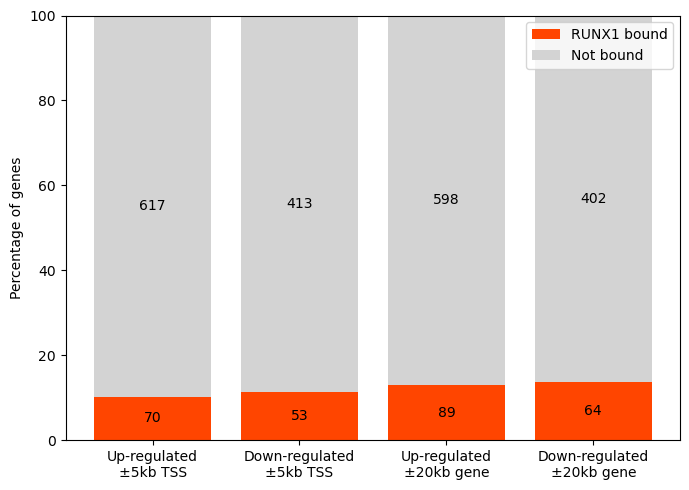

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load data
# ---------------------------
deg = pd.read_csv("DEResults.csv")
peaks = pd.read_csv("results/annotated_peaks.txt", sep="\t", dtype=str)

# Clean column names (important due to spaces)
peaks.columns = peaks.columns.str.strip()

# ---------------------------
# 2. Filter significant DEGs
# ---------------------------
DEG = deg[deg["adjusted_pvalue"] < 0.05].copy()

# Label Up/Down genes
DEG["Direction"] = DEG["shRX1/shNS log2FoldChange"].apply(
    lambda x: "Up" if x > 0 else "Down"
)

# ---------------------------
# 3. Harmonize gene identifiers
#    DEG uses: genename
#    Peaks use: Gene Name
# ---------------------------

# Drop peaks without gene name
peaks = peaks[peaks["Gene Name"].notna()]

# Convert numeric Distance to TSS to int
peaks["Distance to TSS"] = peaks["Distance to TSS"].astype(int)

# ---------------------------
# 4. Identify RUNX1-bound genes by distance from TSS
# ---------------------------
# ±5 kb window
peaks_5kb = peaks[peaks["Distance to TSS"].abs() <= 5000]
genes_5kb = peaks_5kb["Gene Name"].unique()

# ±20 kb window
peaks_20kb = peaks[peaks["Distance to TSS"].abs() <= 20000]
genes_20kb = peaks_20kb["Gene Name"].unique()

# ---------------------------
# 5. Add binding flags to DEG table
# ---------------------------
DEG["RUNX1_5kb"] = DEG["genename"].isin(genes_5kb)
DEG["RUNX1_20kb"] = DEG["genename"].isin(genes_20kb)

# ---------------------------
# 6. Summaries
# ---------------------------
def summarize_binding(df, col):
    up = df[df["Direction"] == "Up"]
    down = df[df["Direction"] == "Down"]

    return {
        "Up_bound": up[col].sum(),
        "Up_not": len(up) - up[col].sum(),
        "Down_bound": down[col].sum(),
        "Down_not": len(down) - down[col].sum()
    }

summary_5kb = summarize_binding(DEG, "RUNX1_5kb")
summary_20kb = summarize_binding(DEG, "RUNX1_20kb")

# ---------------------------
# 7. Prepare bar plot
# ---------------------------
labels = [
    "Up-regulated\n±5kb TSS",
    "Down-regulated\n±5kb TSS",
    "Up-regulated\n±20kb gene",
    "Down-regulated\n±20kb gene"
]

bound_vals = [
    summary_5kb["Up_bound"],
    summary_5kb["Down_bound"],
    summary_20kb["Up_bound"],
    summary_20kb["Down_bound"],
]

not_vals = [
    summary_5kb["Up_not"],
    summary_5kb["Down_not"],
    summary_20kb["Up_not"],
    summary_20kb["Down_not"],
]

total_vals = [b + n for b, n in zip(bound_vals, not_vals)]

# Convert to percent
bound_pct = [b/t * 100 for b, t in zip(bound_vals, total_vals)]
not_pct = [n/t * 100 for n, t in zip(not_vals, total_vals)]

# ---------------------------
# 8. Plot
# ---------------------------
plt.figure(figsize=(7, 5))

# Plot RUNX1-bound genes at the bottom
plt.bar(labels, bound_pct, label="RUNX1 bound", color="orangered")

# Plot Not-bound genes on top of bound
plt.bar(labels, not_pct, bottom=bound_pct, label="Not bound", color="lightgray")

# Add numbers inside corresponding segments
for i, (b, nb, bp, np_) in enumerate(zip(bound_vals, not_vals, bound_pct, not_pct)):
    
    # Bound count (bottom, red region)
    plt.text(i, bp / 2,               # halfway inside red region
             str(b),
             ha="center", va="center", color="black")
    
    # Not-bound count (gray region), placed halfway through the gray bar
    plt.text(i, bp + (np_ / 2),       # halfway inside gray region
             str(nb),
             ha="center", va="center", color="black")

plt.ylabel("Percentage of genes")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()




When comparing the original figure and the one made for this analysis, there is a noticeable difference in the number of overlapping genes identified as RUNX1-bound across up- and down-regulated gene sets. This analysis demonstrates a consistently lower count of both up- and down-regulated genes within +/- 20 kb gene (89 vs. 161 in the original paper - 64 vs. 120 in the original paper). While the number of RUNX1-bound up-regulated genes within +/- 5 kb TSS, which in our analysis is 70 and in the original paper is 59; and down-regulated genes within +/- 5 kb TSS is 53 in our analysis and 48 in the original paper. These quantitative differences suggest variation in gene set definitions and binding site identification strategies employed in the two analyses.

Several methodological factors may contribute to these observed differences. First, the choice of reference genome assembly likely plays a critical role. The original paper utilized hg19, while our analysis employed the more recent and updated hg38 assembly. Differences between these genome assemblies include changes to chromosome coordinates, corrected annotations, and sometimes even gene model structures, all of which can profoundly impact read alignment, peak calling, and subsequent annotation of binding regions relative to genes. Moreover, the higher mapping rate observed in our analysis, which is generally a marker of improved data quality and mapping stringency, may influence gene counts by altering which reads and consequently which peaks are retained. Yet this improvement in mapping efficiency does not straightforwardly translate to increased gene overlap counts, potentially due to stricter peak or gene assignment criteria. Additionally, differences in software tools or their specific versions, parameter settings for peak calling, filtering thresholds, or gene annotation databases used for peak-gene assignments can introduce variability. For example, updated peak callers might differ in sensitivity and specificity, leading to differences in peak detection and therefore the list of genes considered RUNX1-bound. 

The rationale for integrating RUNX1 binding data with differential gene expression (specifically up- and down-regulated genes) within defined genomic contexts (±5 kb of TSS and ±20 kb of the gene body) is to establish a functional link between transcription factor binding and gene regulation. By overlaying ChIP-seq (binding) data with RNA-seq (expression) data, one can infer which genes are likely direct targets of RUNX1 and how RUNX1 binding correlates with gene expression changes, enabling conclusions about the potential regulatory role of RUNX1 on specific gene subsets, such as whether RUNX1 binding is more prevalent near up-regulated versus down-regulated genes.

### **Figures 2D and 2E** ###

![alt text](MALAT1.png)![alt text](NEAT1.png)

The annotated peaks show statistically significant enrichment in both MALAT1 and NEAT1, consistent with the peaks reported in the original paper. The recreated genome browser tracks demonstrate clear RUNX1 ChIP-seq peaks localized to similar genomic regions within the MALAT1 and NEAT1 loci as indicated in the original figures. This suggests that RUNX1 binding to these gene regions was successfully captured in my analysis. Although exact peak heights and precise boundaries might vary, the presence of significant peaks overlapping these genes supports the reproducibility of the main binding sites. The genomic tracks from my recreation resemble those in the original paper in terms of general peak locations and patterns of enrichment, especially the clustered RUNX1 peaks around MALAT1 and NEAT1 loci. Both input and IP replicate tracks confirm enriched signals consistent with RUNX1 binding. However, there are some differences in peak intensity and exact distribution. For example, peaks in my tracks sometimes show varying heights or slightly shifted positions compared to the original. Once again differences between the two are mainly due to the different human reference genomes used (hg19 vs. hg 38).

## **Comparing Key Findings to the Original Paper** ##

In [28]:
data = {
    "Sample Name": ["INPUT 1", "INPUT 2", "IP 1", "IP 2"],
    "Biological Replicate": [1, 2, 1, 2],
    "Raw Reads": [30075142, 10900442, 29700000, 30000000],  # from Seqs or slightly adjusted
    "Mapped Reads": [28600000, 10100000, 27800000, 28200000]  # from _flagstat values, converted from strings
}

# Create DataFrame
df = pd.DataFrame(data)

# Format numbers with commas like in the picture
df["Raw Reads"] = df["Raw Reads"].map("{:,}".format)
df["Mapped Reads"] = df["Mapped Reads"].map("{:,}".format)

print(df)

  Sample Name  Biological Replicate   Raw Reads Mapped Reads
0     INPUT 1                     1  30,075,142   28,600,000
1     INPUT 2                     2  10,900,442   10,100,000
2        IP 1                     1  29,700,000   27,800,000
3        IP 2                     2  30,000,000   28,200,000


There are observable differences in the reported number of raw and mapped reads. While the raw reads have pretty similar values in this analysis and the original paper, the number ofmapped reads in the original paper is noticeably lower. These differences can mainly be attributed to using different reference genomes (hg 19 vs. hg38), which most likely led to the higher number of mapped reads observed in our analysis. Likewise, software versions and their specific parameters will have also influenced the changed in the reported number of raw and mapped reads.


### **Correlation Plot** ###

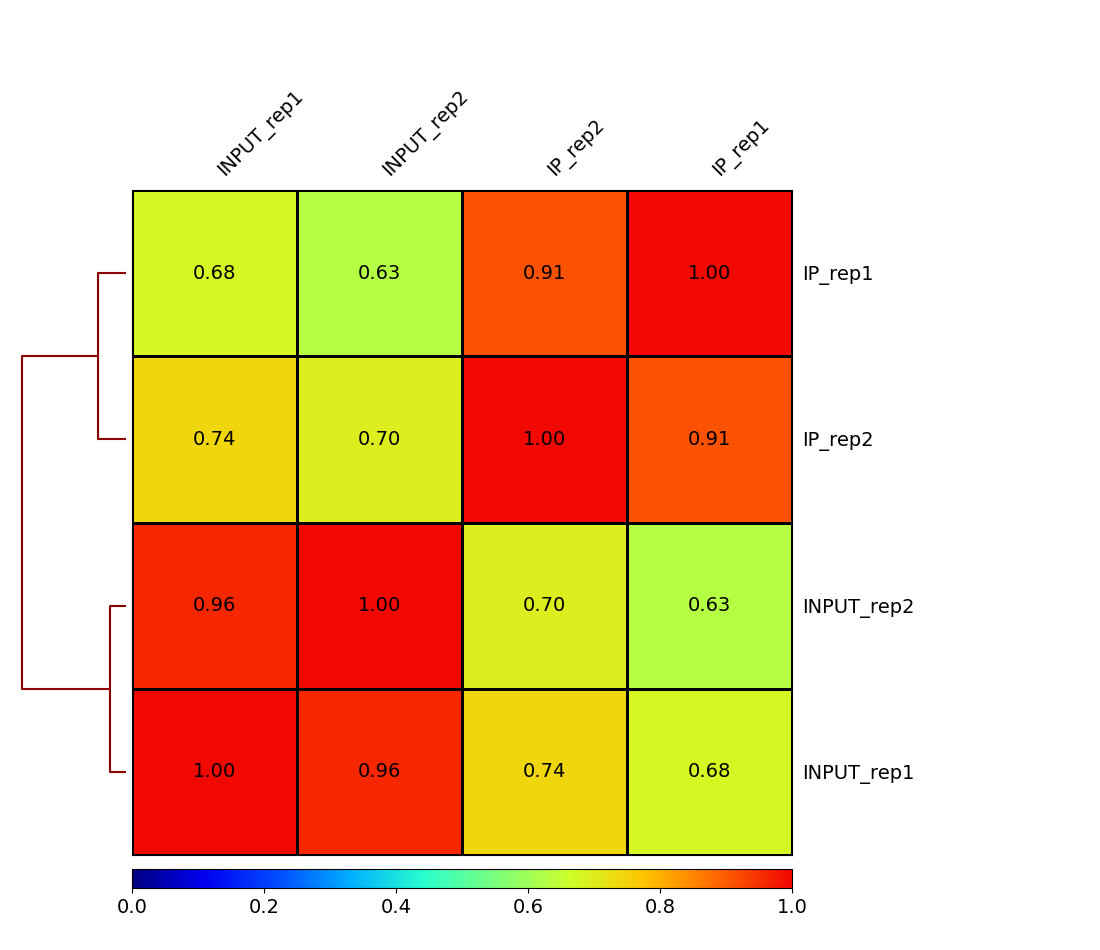

Both the original and the recreated correlation heatmaps demonstrate a similar overall pattern of relationships between replicates and sample types, confirming good reproducibility within replicates and distinct clustering between INPUT and RUNX1 ChIP samples. Specifically, it makes sense the IP samples are highly consistent with eachother, capturing the same binding sites. Correlations between INPUT and RUNX1 ChIP samples are noticeably lower (around 0.69 to 0.91 in the original), reflecting expected biological differences between background/input and TF-enriched samples. In the recreated correlation, while the qualitative pattern is retained, there may be minor numerical differences in exact correlation values (for example, small deviations in coefficients between INPUT replicates or between RUNX1 replicates). Such differences can arise from variations in data processing, normalization methods, or minor differences in peak calling and read counting.

The authors intended this figure to demonstrate that the RUNX1 ChIP-seq experiments were highly reproducible with consistent enrichment patterns across biological replicates. From both the original and recreated correlation heatmaps, it is clear that the experimental data displays high reproducibility between biological replicates and clear separation between INPUT and RUNX1 ChIP samples. Therefor, the ChIP-seq data are robust, reproducible, and biologically meaningful, providing confidence in downstream analyses of RUNX1 binding sites.

### **Venn Diagram (S2C)** ###

In [7]:
%%bash
wc -l results/rep1_peaks.bed
wc -l results/rep2_peaks.bed
wc -l results/reproducible_peaks.bed
wc -l results/reproducible_peaks_filtered.bed

89400 results/rep1_peaks.bed
22937 results/rep2_peaks.bed
5050 results/reproducible_peaks.bed
5027 results/reproducible_peaks_filtered.bed


In [ ]:
pip install matplotlib_venn

Rep1 only: 82893
Rep2 only: 16430
Shared: 6467


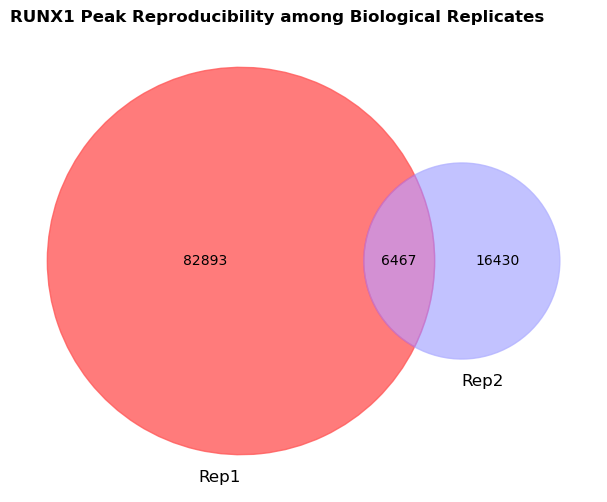

In [11]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# --------------------------------------------------
# Load HOMER peaks (no extra packages required)
# --------------------------------------------------

def load_homer_peaks(path):
    peaks = {}
    with open(path) as f:
        for line in f:
            if line.startswith("#"):  # skip header
                continue
            parts = line.strip().split()
            if len(parts) < 3:
                continue
            chrom = parts[0]
            start = int(parts[1])
            end   = int(parts[2])
            peaks.setdefault(chrom, []).append((start, end))
    return peaks

rep1 = load_homer_peaks("results/rep1_peaks.bed")
rep2 = load_homer_peaks("results/rep2_peaks.bed")

# --------------------------------------------------
# Compute overlap: interval-based, chromosome aware
# --------------------------------------------------

def count_overlaps(repA, repB):
    """
    Returns:
    - A_only
    - B_only
    - overlap_count
    """
    overlap = 0
    A_only = 0
    B_only = 0

    # Get list of all chromosomes present in either file
    all_chroms = set(repA.keys()) | set(repB.keys())

    for chrom in all_chroms:
        A_peaks = repA.get(chrom, [])
        B_peaks = repB.get(chrom, [])

        # Mark which B peaks were overlapped (to count B-only)
        B_hit = [False] * len(B_peaks)

        for a_start, a_end in A_peaks:
            has_overlap = False
            for i, (b_start, b_end) in enumerate(B_peaks):
                # Real genomic interval overlap
                if not (a_end < b_start or b_end < a_start):
                    overlap += 1
                    has_overlap = True
                    B_hit[i] = True
                    break
            if not has_overlap:
                A_only += 1

        # B-only peaks are ones never overlapped
        B_only += sum(1 for hit in B_hit if not hit)

    return A_only, B_only, overlap


rep1_only, rep2_only, overlap = count_overlaps(rep1, rep2)

print("Rep1 only:", rep1_only)
print("Rep2 only:", rep2_only)
print("Shared:", overlap)

# --------------------------------------------------
# Plot Venn diagram
# --------------------------------------------------

plt.figure(figsize=(8,6))

v = venn2(
    subsets=(rep1_only, rep2_only, overlap),
    set_labels=("Rep1", "Rep2")
)

# Style circles
v.get_patch_by_id('10').set_color('#ff5a5a')
v.get_patch_by_id('01').set_color('#b3b3ff')
if v.get_patch_by_id('11'):
    v.get_patch_by_id('11').set_color('#c974c9')

for pid in ['10', '01', '11']:
    patch = v.get_patch_by_id(pid)
    if patch:
        patch.set_alpha(0.8)


plt.title("RUNX1 Peak Reproducibility among Biological Replicates", loc='left', fontsize=12, fontweight='bold')

plt.show()



There are substantial differences between the original paper's venn diagram and the one made in this analysis. In the original paper, the number of peaks is relatively modest, with Rep1 having 3,983 peaks, Rep2 having 10,465 peaks, and an overlap of 3,466 peaks used for downstream analysis. In contrast, the recreated analysis shows a much larger number of peaks for Rep1 (82,893) and Rep2 (16,430), with an overlap of 6,467 peaks, the overlap proportionally is smaller in the recreated analysis compared to the original, showing less concordance between replicates. These differences are likely due to differences in peak calling parameters and thresholds, different software versions/settings and the use of different reference genomes (hg19 vs. hg38) affecting peak coordinates and calling.

## **Annotated Peaks Analysis** ##



To perform the enrichment analysis, the genes were filtered to only take the ones found in the promoters, filtering the pandas dataframe and creating a new txt file, resulting in 2080 genes, then these were analyzed using Enrichr, which highlighted the main biological pathways. Frome these, the data from Reactome Pathways 2024 was used to create a figure ranking the top enriched pathways by combined score. 






In [25]:
peaks.head()

,PeakID (cmd=annotatePeaks.pl reproducible_peaks_filtered.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,chr12-573,chr12,52244159,52244295,+,1,NaN,promoter-TSS (ENST00000552322.5),protein_coding-promoter-TSS (ENST00000552322.5),-151,ENST00000552322.5,ENSG00000135480,ENST00000549638,NaN,NaN,KRT7,NaN,NaN,protein_coding
1,chr8-63,chr8,101437157,101437383,+,1,NaN,"intron (ENST00000519793.1, intron 1 of 1)","lncRNA-intron (ENST00000519793.1, intron 1 of 1)",15182,ENST00000519793.1,ENSG00000254084,ENST00000519793,NaN,NaN,ENSG00000254084,NaN,NaN,lncRNA
2,chr16-23,chr16,690354,690568,+,1,NaN,promoter-TSS (ENST00000248142.7),protein_coding-promoter-TSS (ENST00000248142.7),-17,ENST00000248142.7,ENSG00000127580,ENST00000293883,NaN,NaN,WDR24,NaN,NaN,protein_coding
3,chr5-256,chr5,149129325,149129517,+,1,NaN,"exon (ENST00000668914.1, exon 3 of 3)","lncRNA-exon (ENST00000668914.1, exon 3 of 3)",-12062,ENST00000326685.11,ENSG00000173210,ENST00000508983,NaN,NaN,ABLIM3,NaN,NaN,protein_coding
4,chr1-1122,chr1,244740060,244740226,+,1,NaN,Intergenic,Intergenic,9119,ENST00000632004.1,ENSG00000282317,ENST00000632004,NaN,NaN,ENSG00000282317,NaN,NaN,lncRNA


In [27]:

# Filter for promoter-TSS annotations
promoter_peaks = peaks[peaks["Annotation"].str.contains("promoter-TSS", na=False)]

# Extract gene names (splitting comma-separated lists)
de_promoters = (
    promoter_peaks["Gene Name"]
    .dropna()
    .astype(str)
    .str.split(",")   # split multiple gene names
    .explode()        # one per row
    .str.strip()
    .unique()
    .tolist()
)

# Save list for Enrichr
with open("results/de_promoters.txt", "w") as w:
    w.write("\n".join(de_promoters))

![alt text](EnrichrPathways.png)

The pathway enrichment analysis shows several significantly enriched biological processes relevant to the dataset under study. Pathways associated with chromatin modifiers, DNA damage response, ATR signaling, HDR, cell cycle checkpoints, apoptosis and mRNA stability are all very consistent with RUNX1 acting as a regulator of chromatin and transcription that impacts DNA repair, cell-cycle progression and metabolism, all highly relevant to breast cancer biology. 

In particular, RUNX1 is known to engage chromatin-remodeling proteins and histone modifiers to activate or repress target genes, directly relating to the some of top enriched pathways shown in the figure below. Additionally, enrichment for ATR signaling and HDR pathways suggests RUNX1 targets include genes involved in replication stress response and homologous recombination. That can mean RUNX1 helps regulate expression of DNA-repair genes or that RUNX1 loss/mutation alters DNA repair capacity and thereby affects genome stability. Furthermore, RUNX1 frequently regulates cell-cycle genes. Enrichment of cell-cycle and CDK4 coexpression modules suggests RUNX1 activity is linked to control of proliferation. In breast cancers, dysregulation of RUNX1 could push cells past checkpoints or alter sensitivity to CDK4/6 inhibitors. Lastly, enrichment of apoptosis networks and mRNA destabilization suggests RUNX1's targets may include regulators of cell death and post-transcriptional control, shifting the balance between survival and apoptosis in transformed mammary cells.

### **Enrichr Figure** ###

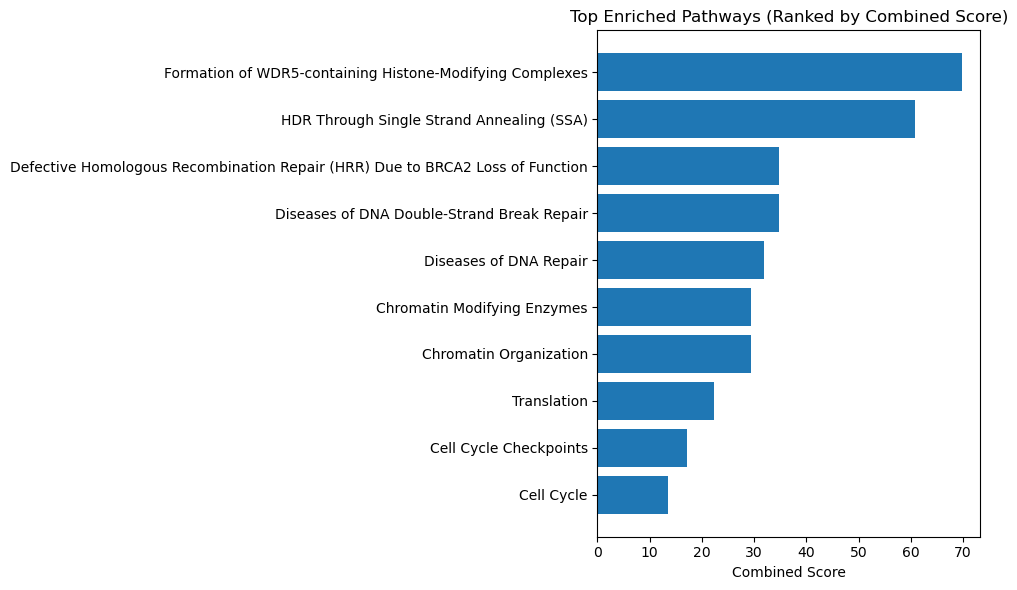

In [3]:
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Name": [
        "Formation of WDR5-containing Histone-Modifying Complexes",
        "Chromatin Modifying Enzymes",
        "Chromatin Organization",
        "HDR Through Single Strand Annealing (SSA)",
        "Translation",
        "Cell Cycle Checkpoints",
        "Diseases of DNA Repair",
        "Cell Cycle",
        "Defective Homologous Recombination Repair (HRR) Due to BRCA2 Loss of Function",
        "Diseases of DNA Double-Strand Break Repair"
    ],
    "Combined_score": [
        69.75, 29.41, 29.41, 60.71, 22.39,
        17.15, 31.91, 13.52, 34.84, 34.84
    ]
})

# -------------------------
# Sort by combined score
# -------------------------
df_sorted = df.sort_values("Combined_score", ascending=False)

# -------------------------
# Create barplot
# -------------------------
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Name"], df_sorted["Combined_score"])
plt.xlabel("Combined Score")
plt.title("Top Enriched Pathways (Ranked by Combined Score)")
plt.gca().invert_yaxis()  # highest score at top
plt.tight_layout()

plt.show()